<a href="https://colab.research.google.com/github/JhonatanIT/python-colab-notebooks/blob/main/TimeSeriesCovid19ConfirmedGlobal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series COVID 19 Confirmed Global

## 1. Dataset Preparation

Import libraries

In [ ]:
import pandas as pd               #create tables, dataframes and structures to manipulate data
import numpy as np                #multidimensional array object(arrays and matrices)
import matplotlib.pyplot as plt   #Data visualization
import seaborn as sns             #Data visualization (more aesthetic)

#To allow Jupyter notebooks to use matplotlib
%matplotlib inline

Get data

In [ ]:
#Using pandas to create a dataframe of csv file
data = pd.read_csv('time_series_covid19_confirmed_global.csv')     #reading csv

#Reference Dataset
#Date downloaded: 28/04/2023
#https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases -> time_series_covid19_confirmed_global.csv 

Data exploration with Pandas 

In [ ]:
#The first 10 rows
data.head(10)

#Some countries like Australia have data in Province/State.
#From column 1/22/20 (22nd January 2020) forward, the number of confirmed Covid19 cases is counted.

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,10044125,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,446819,446819,446819,446819,446819,446819,446819,446819,447308,447308
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,232018,232018,232619,232619,232619,232619,232619,232619,232619,232974


In [ ]:
data.info()

#Rows: 289
#Columns: 1147
#  2 float columns (Lat, Long) 
#  1143 int colums(column of confirmed cases by date) 
#  2 object columns (Province/State, Country/Region)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


## 2. Data Analysis and Visualization

Data analysis and visualization of the top three infected countries

In [ ]:
#Some countries have several rows separated by province/state
#First we have to aggregate the dataset by Country/Region column
data.groupby('Country/Region').first()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,None,33.939110,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,None,41.153300,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,None,28.033900,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,None,42.506300,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,None,-11.202700,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,None,31.952200,35.233200,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,None,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,None,15.552727,48.516388,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [ ]:
#Last column
data.columns.values[-1]

'3/9/23'

In [ ]:
#Taking into account that the last column "3/9/23" has the most updated data on confirmed cases, 
#then we will use this column to identify the 3 countries with the most confirmed cases

#.sum() -> use summarise as a agregation function
#.sort_values('3/9/23', ascending=False) -> sort values by '3/9/23' column in descending order
#.head(3) -> 3 first values
data_groupByCountry = data.groupby('Country/Region').sum().sort_values('3/9/23', ascending=False).head(3)

In [ ]:
#We have identified the top three infected countries: US, India, France.
data_groupByCountry

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,40.000000,-100.000000,1,1,2,2,5,5,5,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702
India,0,20.593684,78.962880,0,0,0,0,0,0,0,...,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738
France,French GuianaFrench PolynesiaGuadeloupeMartini...,77.103595,-118.075614,0,0,2,3,3,3,4,...,39827175,39831700,39835896,39839090,39839090,39839090,39847236,39854299,39860410,39866718


### a) Predictive Modelling

Fit a linear regression model to the time series for each of the three countries

Assumption: The infection rate has been increasing since the official record started

Independent variable: the week number

Dependent variable: count of infection for week 

In [ ]:
#Convert the tjme-series data and represent the dates in the form of a week number.
#Example: 1/22/20-1/28/20 -> Week1 , 1/29/20-2/4/20 -> Week2

data_groupByCountry = data_groupByCountry.iloc[:, 3:]

#.iloc[:, 3:] -> all rows (:) and all colums from '1/22/20' forward (3:)

#The counter of rows and colums start in 0:
#  Column 0º = 'Province/State'
#  Column 1º = 'Lat'
#  Column 2º = 'Long'
#  Column 3º = '1/22/20'

In [ ]:
#No consider the first 3 columns ('Province/State', 'Lat', 'Long')
data_groupByCountry

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702
India,0,0,0,0,0,0,0,0,1,1,...,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738
France,0,0,2,3,3,3,4,5,5,5,...,39827175,39831700,39835896,39839090,39839090,39839090,39847236,39854299,39860410,39866718


In [ ]:
#Number of columns: 1143
data_groupByCountry.columns.size

1143

In [ ]:
#I need to identify the column index of each week

#The column 6º identified the end of the first week: 1/28/20
data_groupByCountry.iloc[:, 6]

Country/Region
US        5
India     0
France    4
Name: 1/28/20, dtype: int64

In [ ]:
#Generate a list of indexes starting from number 6 and adding 7 days (one week).
index_column_weeks = np.arange(6, data_groupByCountry.columns.size, 7)

#Evaluate to consider the last column that is not completed a week
#data_groupByCountry.columns.size % 7 != 0 -> residue of dividing columns.size / 7 is different of 0 (is not a completed week)
if data_groupByCountry.columns.size % 7 != 0:
    index_column_weeks = np.append(index_column_weeks, data_groupByCountry.columns.size-1)
index_column_weeks

array([   6,   13,   20,   27,   34,   41,   48,   55,   62,   69,   76,
         83,   90,   97,  104,  111,  118,  125,  132,  139,  146,  153,
        160,  167,  174,  181,  188,  195,  202,  209,  216,  223,  230,
        237,  244,  251,  258,  265,  272,  279,  286,  293,  300,  307,
        314,  321,  328,  335,  342,  349,  356,  363,  370,  377,  384,
        391,  398,  405,  412,  419,  426,  433,  440,  447,  454,  461,
        468,  475,  482,  489,  496,  503,  510,  517,  524,  531,  538,
        545,  552,  559,  566,  573,  580,  587,  594,  601,  608,  615,
        622,  629,  636,  643,  650,  657,  664,  671,  678,  685,  692,
        699,  706,  713,  720,  727,  734,  741,  748,  755,  762,  769,
        776,  783,  790,  797,  804,  811,  818,  825,  832,  839,  846,
        853,  860,  867,  874,  881,  888,  895,  902,  909,  916,  923,
        930,  937,  944,  951,  958,  965,  972,  979,  986,  993, 1000,
       1007, 1014, 1021, 1028, 1035, 1042, 1049, 10

In [ ]:
#Get confirmed cases by week (each column it is a week)
data_week = data_groupByCountry.iloc[:,index_column_weeks]
data_week

,1/28/20,2/4/20,2/11/20,2/18/20,2/25/20,3/3/20,3/10/20,3/17/20,3/24/20,3/31/20,...,1/10/23,1/17/23,1/24/23,1/31/23,2/7/23,2/14/23,2/21/23,2/28/23,3/7/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,5,11,13,14,16,74,782,6512,56714,192079,...,101399138,101734426,102086966,102362870,102676694,102934224,103198669,103443455,103690910,103802702
India,0,3,3,3,3,5,56,142,536,1397,...,44681610,44682595,44683430,44684120,44684864,44685601,44686483,44687837,44689919,44690738
France,4,6,11,12,14,212,1783,7715,22372,52281,...,39625664,39666044,39697613,39729161,39753017,39775390,39800890,39827175,39854299,39866718


#### **US linear regression model**

In [ ]:
#Tranform the first row (US confirmed cases) in a dataframe of 2 columns: week_number | confirmed_cases 

#list(range(1,data_week.columns.size+1)) -> generate a list of number from 1 to numbers of weeks (depend on column size)
#list(data_week.iloc[0]) -> Get confirmed cases from US (index: 0)
data_us = { 'week_number': list(range(1,data_week.columns.size+1)), 'confirmed_cases': list(data_week.iloc[0]) }

In [ ]:
#Generate the DataFrame for US confirmed cases
lineal_regression_us = pd.DataFrame(data_us)
lineal_regression_us

,week_number,confirmed_cases
0,1,5
1,2,11
2,3,13
3,4,14
4,5,16
...,...,...
159,160,102934224
160,161,103198669
161,162,103443455
162,163,103690910


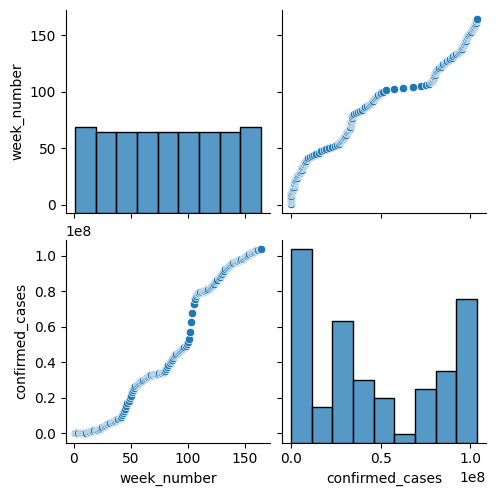

In [ ]:
#Exploratory Analysis

#In US, there were 2 rapid raising of cases (around 50th week and 100th week)
sns.pairplot(lineal_regression_us)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Independent variable: week_number
x_us = lineal_regression_us[['week_number']]

#Dependent variable: confirmed_cases
y_us = lineal_regression_us['confirmed_cases']

#Split training and test data
x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x_us, y_us, test_size=0.3, random_state=101)

#Create Linear Regression model
lm_us = LinearRegression()

#Train the Linear Regression model
lm_us.fit(x_train_us,y_train_us)

LinearRegression()

In [ ]:
#Interceptor value: The mean value of the response variable when x = 0
#in the week 0 there are -14754081.916192107 cases
print("Interceptor:",lm_us.intercept_)

#Refs:
#https://www.statology.org/intercept-in-regression/#:~:text=The%20intercept%20%28sometimes%20called%20the%20%E2%80%9Cconstant%E2%80%9D%29%20in%20a,simple%20linear%20regression%20and%20multiple%20linear%20regression%20models.

Interceptor: -14754081.916192107


In [ ]:
coeff_df_us = pd.DataFrame(lm_us.coef_,x_us.columns,columns=['Coeficient'])
coeff_df_us

,Coeficient
week_number,758114.48939


Coeficient interpretation:

- Keeping the other characteristics fixed, an increase of 1 unit in **week_unit** is associated with an **increase of 758114.48939 confirmed Covid19 cases**.


Taking into account that a linear regression have the following form:

B0 + B1 * X = Y

Where:

- **B0 Interceptor**: -14754081.916192107
- **B1 Coefficient**: 758114.48939
- **X**: Nº week
- **Y**: Nº Covid19 confirmed causes

The lineal regression for Covid19 Confirmed causes in US is:

**-14754081.916192107 + 758114.48939 * (Nº week) = Nº confirmed causes in US**

In [ ]:
#Evaluate the model
predictions_us = lm_us.predict(x_test_us)
predictions_us

array([ 6.25735960e+07,  7.92521148e+07,  4.66531917e+07,  9.50558174e+06,
        6.33317105e+07,  1.55704977e+07,  7.54615423e+07,  7.16709699e+07,
        1.17799252e+07, -1.86613560e+06,  2.39097570e+07,  1.70867266e+07,
        7.69777713e+07,  5.04437642e+07,  4.96856497e+07,  1.10218107e+07,
        2.77003295e+07,  2.61841005e+07,  5.57505656e+07,  7.24290844e+07,
        4.51369627e+07,  1.02636962e+07,  9.82049770e+07,  3.67977034e+07,
        5.49924511e+07,  1.07302351e+08, -1.09635095e+07,  7.39453133e+07,
       -1.32378529e+07,  3.22490164e+07,  2.23935281e+07,  5.72667946e+07,
        9.51725190e+07,  9.28981756e+07,  7.09128554e+07,  9.74468625e+07,
        6.48479395e+07,  1.78448411e+07,  8.45589162e+07,  6.78803974e+07,
        3.45233599e+07,  7.77358858e+07, -4.14047906e+06,  9.66887480e+07,
        4.95689481e+06,  4.81694207e+07,  9.97212060e+07,  1.08060465e+08,
        1.09576694e+08,  5.87830236e+07])

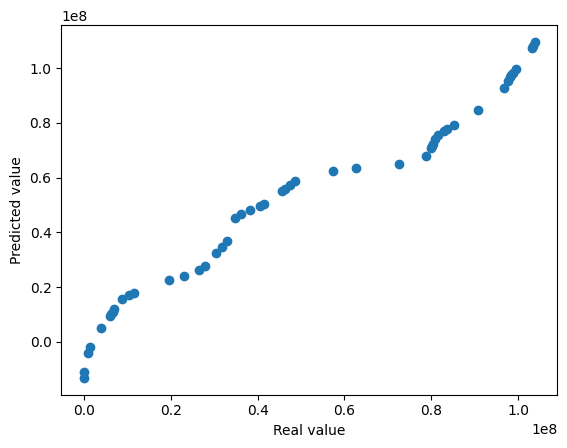

In [ ]:
#Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them
plt.scatter(x=y_test_us,y=predictions_us)

plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.show()

#Ref:
#https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/

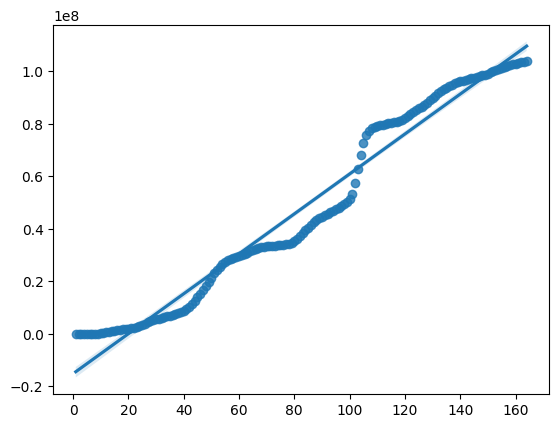

In [ ]:
#create scatterplot with regression line and confidence interval lines
#Create a graph with the lineal regression of US

x_plot_us = np.array(data_us['week_number'])
y_plot_us = np.array(data_us['confirmed_cases'])

sns.regplot(x=x_plot_us, y=y_plot_us);

#### **India linear regression model**

In [ ]:
#Tranform the second row (India confirmed cases) in a dataframe of 2 columns: week_number | confirmed_cases 

#list(range(1,data_week.columns.size+1)) -> generate a list of number from 1 to numbers of weeks (depend on column size)
#list(data_week.iloc[1]) -> Get confirmed cases from India (index: 1)
data_india = { 'week_number': list(range(1,data_week.columns.size+1)), 'confirmed_cases': list(data_week.iloc[1]) }

In [ ]:
#Generate the DataFrame for India confirmed cases
lineal_regression_india = pd.DataFrame(data_india)
lineal_regression_india

,week_number,confirmed_cases
0,1,0
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
159,160,44685601
160,161,44686483
161,162,44687837
162,163,44689919


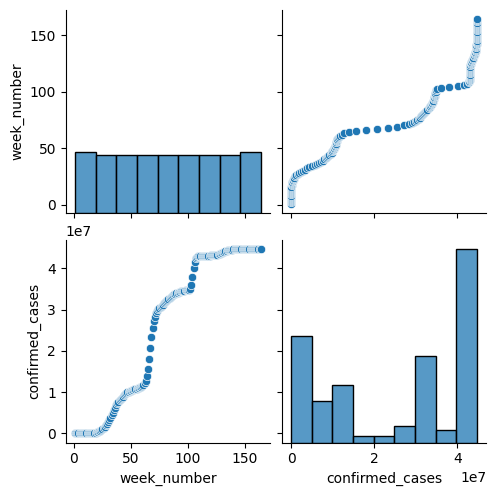

In [ ]:
#Exploratory Analysis

#In India, the first weeks there were barely confirmed cases, 
#after there were 3 rapid raising of cases (around 40th week, 60th week and 100th week)
sns.pairplot(lineal_regression_india)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Independent variable: week_number
x_india = lineal_regression_india[['week_number']]

#Dependent variable: confirmed_cases
y_india = lineal_regression_india['confirmed_cases']

#Split training and test data
x_train_india, x_test_india, y_train_india, y_test_india = train_test_split(x_india, y_india, test_size=0.3, random_state=101)

#Create Linear Regression model
lm_india = LinearRegression()

#Train the Linear Regression model
lm_india.fit(x_train_india,y_train_india)

LinearRegression()

In [ ]:
#Interceptor value: The mean value of the response variable when x = 0
#in the week 0 there are -3863613.486719668 cases
print("Interceptor:",lm_india.intercept_)

#Refs:
#https://www.statology.org/intercept-in-regression/#:~:text=The%20intercept%20%28sometimes%20called%20the%20%E2%80%9Cconstant%E2%80%9D%29%20in%20a,simple%20linear%20regression%20and%20multiple%20linear%20regression%20models.

Interceptor: -3863613.486719668


In [ ]:
coeff_df_india = pd.DataFrame(lm_india.coef_,x_india.columns,columns=['Coeficient'])
coeff_df_india

,Coeficient
week_number,357334.939596


Coeficient interpretation:

- Keeping the other characteristics fixed, an increase of 1 unit in **week_unit** is associated with an **increase of 357334.939596 confirmed Covid19 cases**.


Taking into account that a linear regression have the following form:

B0 + B1 * X = Y

Where:

- **B0 Interceptor**: -3863613.486719668
- **B1 Coefficient**: 357334.939596
- **X**: Nº week
- **Y**: Nº Covid19 confirmed causes

The lineal regression for Covid19 Confirmed causes in India is:

**-3863613.486719668 + 357334.939596 * (Nº week) = Nº confirmed causes in India**

In [ ]:
#Evaluate the model
predictions_india = lm_india.predict(x_test_india)
predictions_india

array([32584550.35208828, 40445919.02320372, 25080516.620569  ,
        7571104.58035734, 32941885.29168443, 10429784.09712659,
       38659244.32522294, 36872569.62724216,  8643109.3991458 ,
        2211080.48641499, 14360468.43268431, 11144453.9763189 ,
       39373914.20441525, 26867191.31854978, 26509856.37895362,
        8285774.45954965, 16147143.13066509, 15432473.25147277,
       29368535.89572287, 37229904.56683832, 24365846.74137668,
        7928439.51995349, 49379292.51310763, 20435162.40581897,
       29011200.95612672, 53667311.7882615 , -2076938.78873889,
       37944574.44603062, -3148943.60752736, 18291152.76824203,
       13645798.55349199, 30083205.77491519, 47949952.754723  ,
       46877947.93593454, 36515234.687646  , 49021957.57351147,
       33656555.17087675, 11501788.91591506, 42947263.60037681,
       35085894.92926137, 19363157.5870305 , 39731249.14401141,
        1139075.66762652, 48664622.63391532,  5427094.9427804 ,
       25795186.49976131, 50093962.39229

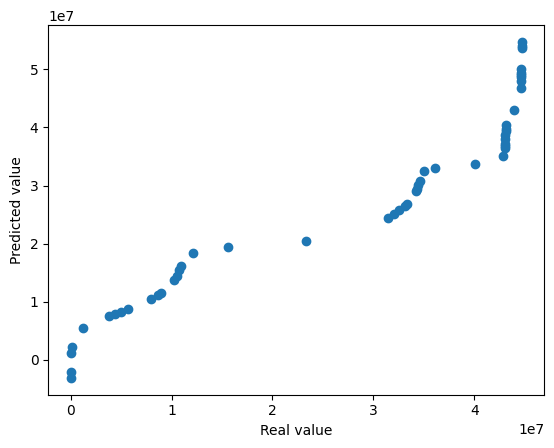

In [ ]:
#Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them
plt.scatter(x=y_test_india,y=predictions_india)

plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.show()
#Ref:
#https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/

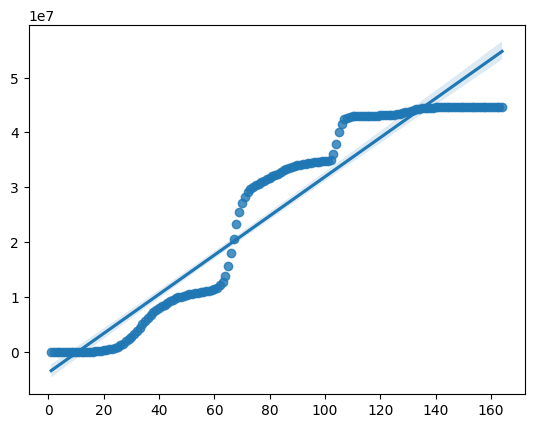

In [ ]:
#create scatterplot with regression line and confidence interval lines
#Create a graph with the lineal regression of India
x_plot_india = np.array(data_india['week_number'])
y_plot_india = np.array(data_india['confirmed_cases'])

sns.regplot(x=x_plot_india, y=y_plot_india);

#### **France linear regression model**

In [ ]:
#Tranform the second row (France confirmed cases) in a dataframe of 2 columns: week_number | confirmed_cases 

#list(range(1,data_week.columns.size+1)) -> generate a list of number from 1 to numbers of weeks (depend on column size)
#list(data_week.iloc[2]) -> Get confirmed cases from France (index: 2)
data_france = { 'week_number': list(range(1,data_week.columns.size+1)), 'confirmed_cases': list(data_week.iloc[2]) }

In [ ]:
#Generate the DataFrame for France confirmed cases
lineal_regression_france = pd.DataFrame(data_france)
lineal_regression_france

,week_number,confirmed_cases
0,1,4
1,2,6
2,3,11
3,4,12
4,5,14
...,...,...
159,160,39775390
160,161,39800890
161,162,39827175
162,163,39854299


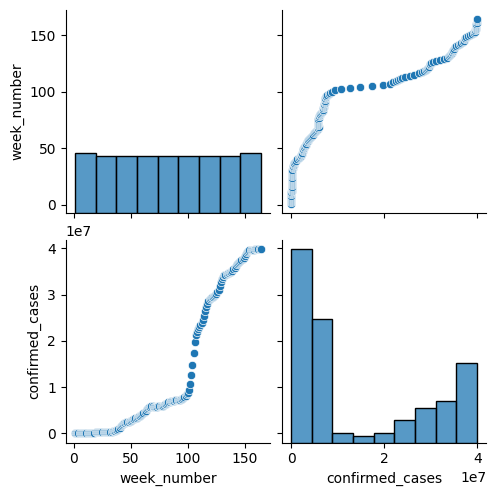

In [ ]:
#Exploratory Analysis

#In France, there was a rapid increase in the number of cases from week 100 until week 150, when it stabilized somewhat
sns.pairplot(lineal_regression_france)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Independent variable: week_number
x_france = lineal_regression_france[['week_number']]

#Dependent variable: confirmed_cases
y_france = lineal_regression_france['confirmed_cases']

#Split training and test data
x_train_france, x_test_france, y_train_france, y_test_france = train_test_split(x_france, y_france, test_size=0.3, random_state=101)

#Create Linear Regression model
lm_france = LinearRegression()

#Train the Linear Regression model
lm_france.fit(x_train_france,y_train_france)

LinearRegression()

In [ ]:
#Interceptor value: The mean value of the response variable when x = 0
#in the week 0 there are -9324907.876084885 cases
print("Interceptor:",lm_france.intercept_)

#Refs:
#https://www.statology.org/intercept-in-regression/#:~:text=The%20intercept%20%28sometimes%20called%20the%20%E2%80%9Cconstant%E2%80%9D%29%20in%20a,simple%20linear%20regression%20and%20multiple%20linear%20regression%20models.

Interceptor: -9324907.876084885


In [ ]:
coeff_df_france = pd.DataFrame(lm_france.coef_,x_france.columns,columns=['Coeficient'])
coeff_df_france

,Coeficient
week_number,289308.819053


Coeficient interpretation:

- Keeping the other characteristics fixed, an increase of 1 unit in **week_unit** is associated with an **increase of 289308.819053 confirmed Covid19 cases**.


Taking into account that a linear regression have the following form:

B0 + B1 * X = Y

Where:

- **B0 Interceptor**: -9324907.876084885
- **B1 Coefficient**: 289308.819053
- **X**: Nº week
- **Y**: Nº Covid19 confirmed causes

The lineal regression for Covid19 Confirmed causes in France is:

**-9324907.876084885 + 289308.819053 * (Nº week) = Nº confirmed causes in France**

In [ ]:
#Evaluate the model
predictions_france = lm_france.predict(x_test_france)
predictions_france

array([20184591.66727524, 26549385.68643133, 14109106.46717168,
         -67025.66640328, 20473900.48632778,  2247444.88601712,
       25102841.59116858, 23656297.49590584,   800900.79075437,
       -4406657.95219153,  5429841.89559517,  2826062.52412222,
       25681459.22927368, 15555650.56243443, 15266341.74338188,
         511591.97170182,  6876385.99085793,  6297768.35275283,
       17580812.29580228, 23945606.31495839, 13530488.82906658,
         222283.15264927, 33782106.16274509, 10348091.81948853,
       17291503.47674973, 37253811.99137569, -7878363.78082213,
       24524223.95306349, -8746290.23797978,  8612238.90517323,
        4851224.25749007, 18159429.93390738, 32624870.88653489,
       31756944.42937724, 23366988.67685328, 33492797.34369254,
       21052518.12443288,  3115371.34317477, 28574547.41979919,
       22209753.40064309,  9480165.36233088, 25970768.04832624,
       -5274584.40934918, 33203488.52463999, -1802878.58071858,
       14687724.10527678, 34360723.80085

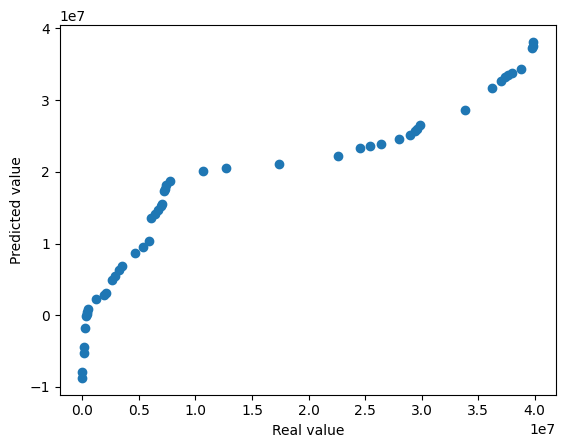

In [ ]:
#Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them
plt.scatter(x=y_test_france,y=predictions_france)

plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.show()
#Ref:
#https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/

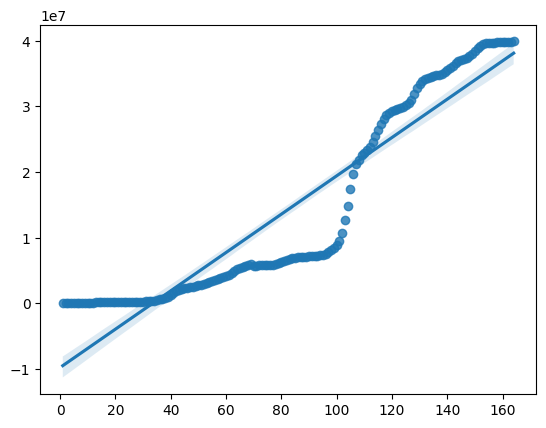

In [ ]:
#create scatterplot with regression line and confidence interval lines
#Create a graph with the lineal regression of France
x_plot_france = np.array(data_france['week_number'])
y_plot_france = np.array(data_france['confirmed_cases'])

sns.regplot(x=x_plot_france, y=y_plot_france);

#### **Regression Evaluation Metrics**


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it is the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in units of "y".

These are all **loss functions**, and we want to minimize them.

In [ ]:
from sklearn import metrics

print('US METRICS')
print('MAE:', metrics.mean_absolute_error(y_test_us, predictions_us))
print('MSE:', metrics.mean_squared_error(y_test_us, predictions_us))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_us, predictions_us)))

print('\nIndia METRICS')
print('MAE:', metrics.mean_absolute_error(y_test_india, predictions_india))
print('MSE:', metrics.mean_squared_error(y_test_india, predictions_india))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_india, predictions_india)))

print('\nFrance METRICS')
print('MAE:', metrics.mean_absolute_error(y_test_france, predictions_france))
print('MSE:', metrics.mean_squared_error(y_test_france, predictions_france))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_france, predictions_france)))

#In the 3 Metric US have obtained the highest score, hence we move forward with the US linear regression model

US METRICS
MAE: 5623607.110507511
MSE: 43495292967980.086
RMSE: 6595096.130306221

India METRICS
MAE: 4539160.229538061
MSE: 24713701546719.9
RMSE: 4971287.715141812

France METRICS
MAE: 4413148.0924702585
MSE: 28754334821054.156
RMSE: 5362306.8562936755


### b) Clustering

In [ ]:
#We choose US Data (country with the highest amount of variance) to perform a K-Means clustering
lineal_regression_us

,week_number,confirmed_cases
0,1,5
1,2,11
2,3,13
3,4,14
4,5,16
...,...,...
159,160,102934224
160,161,103198669
161,162,103443455
162,163,103690910


In [ ]:
#Ref K-means:
#https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

#Clustering algorithms like K-means require feature scaling of the data as part of data preprocessing to produce good results. 
#This is because clustering techniques use distance calculation between the data points. 
#Hence it is proper to bring data of different units under a common scale.

#We use MinMaxScaler to standarise the amounts of the data
scaler = MinMaxScaler()
scale = scaler.fit_transform(lineal_regression_us)
df_scale_us = pd.DataFrame(scale, columns = ['week_number','confirmed_cases']);
df_scale_us.head(5)

,week_number,confirmed_cases
0,0.000000,0.000000e+00
1,0.006135,5.780197e-08
2,0.012270,7.706929e-08
3,0.018405,8.670295e-08
4,0.024540,1.059703e-07


In [ ]:
#Applying Kmeans with 2 Clusters (K=2)

km=KMeans(n_clusters=2,random_state=101)
y_predicted = km.fit_predict(df_scale_us[['week_number','confirmed_cases']])
y_predicted

C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#Find the centroid of the 2 clusters
km.cluster_centers_

array([[0.3006135 , 0.19818415],
       [0.80368098, 0.85467233]])

<Axes: xlabel='week_number', ylabel='confirmed_cases'>

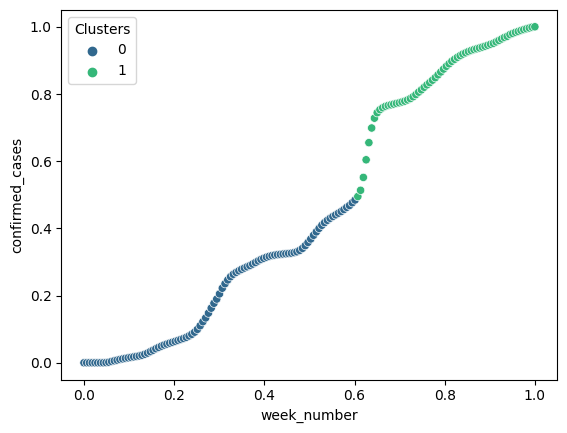

In [ ]:
#Visualize the cluster
df_scale_plot_us = df_scale_us.copy()
df_scale_plot_us['Clusters'] = km.labels_
sns.scatterplot(x="week_number", y="confirmed_cases",hue = 'Clusters',  data=df_scale_plot_us,palette='viridis')

**Finding Optimum number of Clusters in K Means**

In [ ]:
#i) Elbow Method with Within-Cluster-Sum of Squared Error (WCSS)

# calculate the Within-Cluster-Sum of Squared Errors (WCSS) for various values of k and choose the k for which WSS first starts to diminish. 
#In the plot of WSS-versus-k, this can be observed as an elbow.

K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k,random_state=101)
    kmeans=kmeans.fit(df_scale_us)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

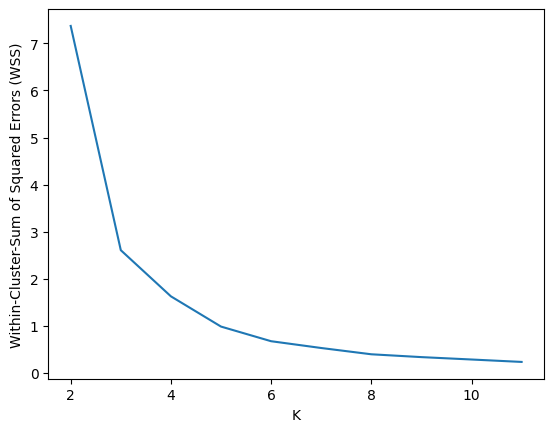

In [ ]:
#It can be seen below that there is an elbow bend at K=3 i.e. 
#it is the point after which WCSS does not diminish much with the increase in value of K.

plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [ ]:
#ii) The Silhouette Method

#The silhouette value measures the similarity of a data point within its cluster. 
#It has a range between +1 and -1 and the higher values denote a good clustering.

for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=101).fit(df_scale_us).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "+str(metrics.silhouette_score(df_scale_us,labels,metric="euclidean",sample_size=1000,random_state=101)))
    
#The maximun value of Silhouette score is for K(cluster) = 2 (0.6735532333759545), but it is quite similar to the value with k(cluster) = 3 (0.6735532333759545)

C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 2 is 0.6735532333759545
Silhouette score for k(clusters) = 3 is 0.6733367704452307
Silhouette score for k(clusters) = 4 is 0.6289981107901247


C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 5 is 0.6092893995911075
Silhouette score for k(clusters) = 6 is 0.5908043130220507


C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 7 is 0.5636518309124529
Silhouette score for k(clusters) = 8 is 0.5537886130801541


C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 9 is 0.5376056347212413
Silhouette score for k(clusters) = 10 is 0.5236462726902903


C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 11 is 0.5208626451180458
Silhouette score for k(clusters) = 12 is 0.515245499756973


In [ ]:
#After evaluate the better value for k (K=3)
#We want to retraining the Kmeans model with K=3

km=KMeans(n_clusters=3,random_state=101)
y_predicted = km.fit_predict(df_scale_us[['week_number','confirmed_cases']])
y_predicted

C:\Users\jhona\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Find the centroid of the 3 clusters
km.cluster_centers_

array([[0.46625767, 0.36178717],
       [0.15030675, 0.05219047],
       [0.81595092, 0.8752408 ]])

<Axes: xlabel='week_number', ylabel='confirmed_cases'>

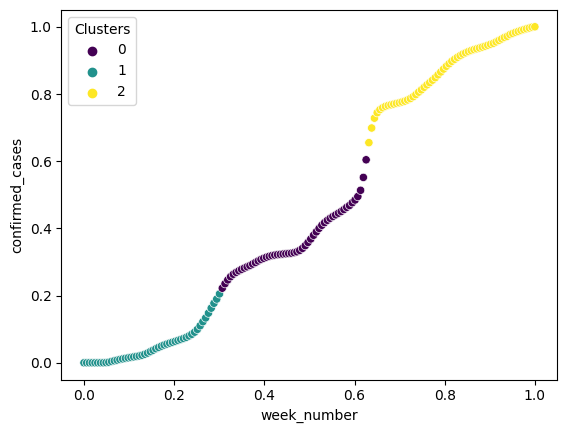

In [ ]:
#Visualize the cluster
df_scale_plot_us = df_scale_us.copy()
df_scale_plot_us['Clusters'] = km.labels_
sns.scatterplot(x="week_number", y="confirmed_cases",hue = 'Clusters',  data=df_scale_plot_us,palette='viridis')

#Like I said previously, in the Covid19 confirmed cases in US the was 2 rapid raising in the covid cases.
#These changes produce 3 specific periods of time (K = 3) in US related with confirmed Covid19 cases:
#1 group: in the first weeks, the first covid19 cases were confirmed before the first wave of rapid increase of confirmed cases.
#2 group: during and after the first wave of rapid increase of confirmed cases, until before the second wave.
#3 group: during and after the second wave of rapid increase of confirmed cases

### c) Graph Analytics / d) Visualization

In [ ]:
#Show the relationship between the US and its neighbourring countries based on the weekly count of infection

#We use the original data
data.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
5,NaN,Antarctica,-71.94990,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,9106,9106,9106,9106,9106,9106,9106,9106,9106,9106
7,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,10044125,10044125,10044125,10044125,10044125,10044125,10044957,10044957,10044957,10044957
8,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,446819,446819,446819,446819,446819,446819,446819,446819,447308,447308
9,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,232018,232018,232619,232619,232619,232619,232619,232619,232619,232974


In [ ]:
#Ref:
#https://infopython.com/how-to-plot-longitude-and-latitude-data-in-python/

#Install plotly
!pip install plotly

#Plotly is a well-known python library because of its ability to provide more graphical tools and functions compared to matplotlib.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px

#1. do some graph maps with plotly library
fig = px.scatter_geo(data, lat='Lat', lon='Long', hover_name="Country/Region")
fig.show()

In [ ]:
#2. Identify the neighbouring countries
#Use the euclidean distance with Latitud and Longitud data to determine the closest countries to US

latitud_us = data.loc[(data['Country/Region'] == 'US')]['Lat'].to_numpy()[0]
longitud_us = data.loc[(data['Country/Region'] == 'US')]['Long'].to_numpy()[0] 

#Latitud US: 40.0, Longitud US: -100.0
print("Latitud US:",latitud_us)
print("Longitud US:",longitud_us)

Latitud US: 40.0
Longitud US: -100.0


In [ ]:
#How many dots are in an specific area
fig = px.density_mapbox(data, lat='Lat', lon='Long', radius=5, mapbox_style="stamen-terrain", center= dict(lat=latitud_us,lon=longitud_us), zoom=2)
fig.show()

In [ ]:
#Define the 5 rows more closest to US
import math

#Procedure to calculate the distance between 2 points
def distance(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

#Generate a copy of the original data
data_with_distance = data.copy()

#Empty list to calculate the distance
distance_list = []

for index, row in data_with_distance.iterrows(): 
    distance_list.append(distance([latitud_us,longitud_us], [row['Lat'],row['Long']]))
    
#Create a new column with the distance
data_with_distance['distance'] = distance_list

In [ ]:
#Ignore the row of US (with distance = 0)
data_close_us_nieghbours = data_with_distance[data_with_distance['distance'] != 0].sort_values('distance').head(5)
data_close_us_nieghbours

#In the list we are identified 2 countries: Canada, Mexico
#See the 'distance' column

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,distance
44,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,154588,154588,154588,154588,154588,154712,154712,154712,154712,13.811922
54,Saskatchewan,Canada,52.9399,-106.4509,0,0,0,0,0,0,...,153255,153255,153255,153255,153255,153651,153651,153651,153651,14.458739
185,NaN,Mexico,23.6345,-102.5528,0,0,0,0,0,0,...,7459860,7459860,7459860,7470128,7470653,7470653,7475219,7479635,7483444,16.563405
50,Ontario,Canada,51.2538,-85.3232,0,2,3,3,3,3,...,1594055,1597751,1597894,1597894,1597894,1597894,1598075,1598075,1601325,18.494769
40,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,628947,628947,628947,628947,628947,628947,628947,629269,629269,21.654496


In [ ]:
#Now that we know that Mexico and Canada are the closest countries to the US, let's use the data grouped by country.
data.groupby('Country/Region').sum()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.939110,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,41.153300,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,28.033900,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,42.506300,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,-11.202700,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,31.952200,35.233200,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,15.552727,48.516388,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [ ]:
#Use only use the data of US, Mexico and Canada
data_can_mex = data.groupby('Country/Region').sum().loc[['Canada','Mexico','US']]
data_can_mex

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Canada,AlbertaBritish ColumbiaDiamond PrincessGrand P...,708.8556,-1202.5979,0,2,3,3,3,3,4,...,4602806,4603795,4608456,4609042,4609458,4609751,4611428,4612219,4613054,4617095
Mexico,0,23.6345,-102.5528,0,0,0,0,0,0,0,...,7451429,7459860,7459860,7459860,7470128,7470653,7470653,7475219,7479635,7483444
US,0,40.0000,-100.0000,1,1,2,2,5,5,5,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702


In [ ]:
#Convert the tjme-series data and represent the dates in the form of a week number.
#Example: 1/22/20-1/28/20 -> Week1 , 1/29/20-2/4/20 -> Week2

data_can_mex = data_can_mex.iloc[:, 3:]

#.iloc[:, 3:] -> all rows (:) and all colums from '1/22/20' forward (3:)

#The counter of rows and colums start in 0:
#  Column 0º = 'Province/State'
#  Column 1º = 'Lat'
#  Column 2º = 'Long'
#  Column 3º = '1/22/20'

In [ ]:
data_can_mex

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Canada,0,2,3,3,3,3,4,4,4,4,...,4602806,4603795,4608456,4609042,4609458,4609751,4611428,4612219,4613054,4617095
Mexico,0,0,0,0,0,0,0,0,0,0,...,7451429,7459860,7459860,7459860,7470128,7470653,7470653,7475219,7479635,7483444
US,1,1,2,2,5,5,5,6,6,8,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702


In [ ]:
#Reuse index_column_weeks used in the previous steps
index_column_weeks

array([   6,   13,   20,   27,   34,   41,   48,   55,   62,   69,   76,
         83,   90,   97,  104,  111,  118,  125,  132,  139,  146,  153,
        160,  167,  174,  181,  188,  195,  202,  209,  216,  223,  230,
        237,  244,  251,  258,  265,  272,  279,  286,  293,  300,  307,
        314,  321,  328,  335,  342,  349,  356,  363,  370,  377,  384,
        391,  398,  405,  412,  419,  426,  433,  440,  447,  454,  461,
        468,  475,  482,  489,  496,  503,  510,  517,  524,  531,  538,
        545,  552,  559,  566,  573,  580,  587,  594,  601,  608,  615,
        622,  629,  636,  643,  650,  657,  664,  671,  678,  685,  692,
        699,  706,  713,  720,  727,  734,  741,  748,  755,  762,  769,
        776,  783,  790,  797,  804,  811,  818,  825,  832,  839,  846,
        853,  860,  867,  874,  881,  888,  895,  902,  909,  916,  923,
        930,  937,  944,  951,  958,  965,  972,  979,  986,  993, 1000,
       1007, 1014, 1021, 1028, 1035, 1042, 1049, 10

In [ ]:
#Get confirmed cases by week (each column it is a week)
data_can_mex_week = data_can_mex.iloc[:,index_column_weeks]
data_can_mex_week

,1/28/20,2/4/20,2/11/20,2/18/20,2/25/20,3/3/20,3/10/20,3/17/20,3/24/20,3/31/20,...,1/10/23,1/17/23,1/24/23,1/31/23,2/7/23,2/14/23,2/21/23,2/28/23,3/7/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Canada,4,5,9,10,19,51,165,854,3997,10711,...,4530402,4541961,4554857,4564114,4573997,4582530,4593925,4602806,4612219,4617095
Mexico,0,0,0,0,0,5,7,93,405,1215,...,7284502,7315454,7348292,7368252,7390230,7410093,7430816,7451429,7475219,7483444
US,5,11,13,14,16,74,782,6512,56714,192079,...,101399138,101734426,102086966,102362870,102676694,102934224,103198669,103443455,103690910,103802702


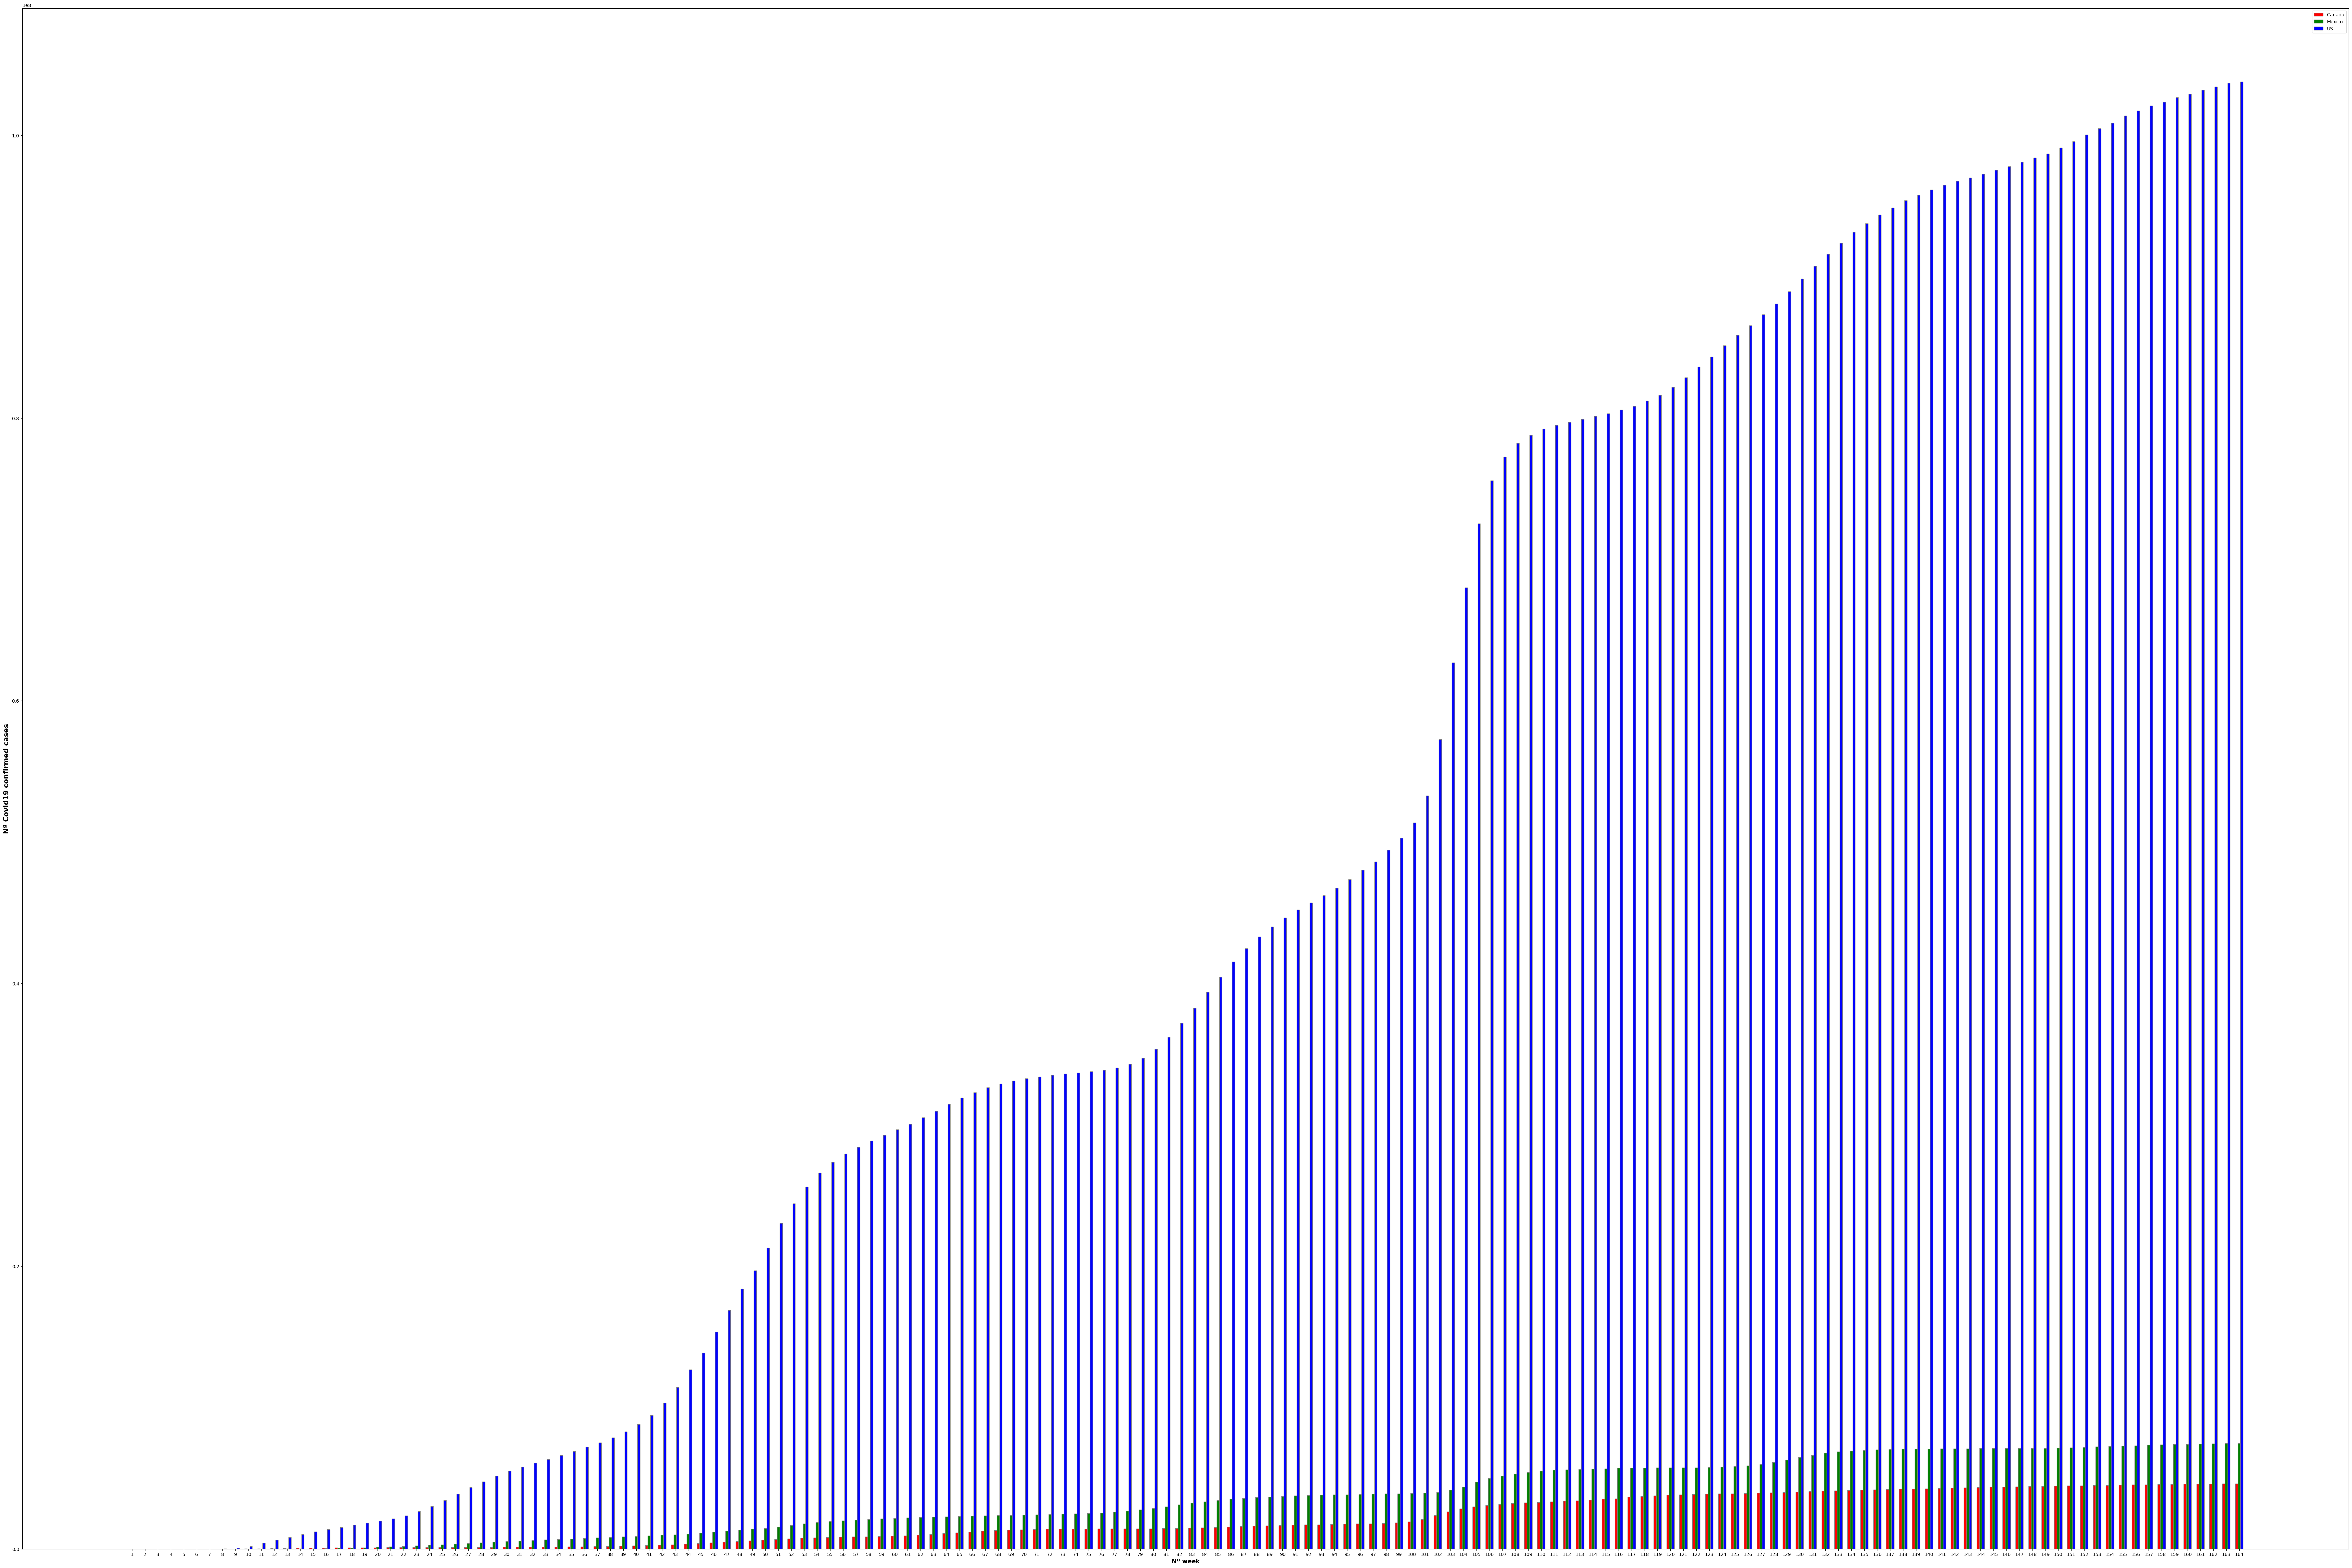

In [ ]:
#ALL WEEK - BAR GRAPHIC

# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(90, 60))

# Set position of bar on X axis
br1 = np.arange(data_can_mex_week.loc['US'].size)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, data_can_mex_week.loc['Canada'].to_numpy(), color ='r', width = barWidth,
        edgecolor ='grey', label ='Canada')
plt.bar(br2, data_can_mex_week.loc['Mexico'].to_numpy(), color ='g', width = barWidth,
        edgecolor ='grey', label ='Mexico')
plt.bar(br3, data_can_mex_week.loc['US'].to_numpy(), color ='b', width = barWidth,
        edgecolor ='grey', label ='US')
 
# Adding Xticks
plt.xlabel('Nº week', fontweight ='bold', fontsize = 13)
plt.ylabel('Nº Covid19 confirmed cases', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(data_can_mex_week.columns.size)],
        list(range(1,data_can_mex_week.columns.size+1)) )

    
plt.legend()
plt.show()

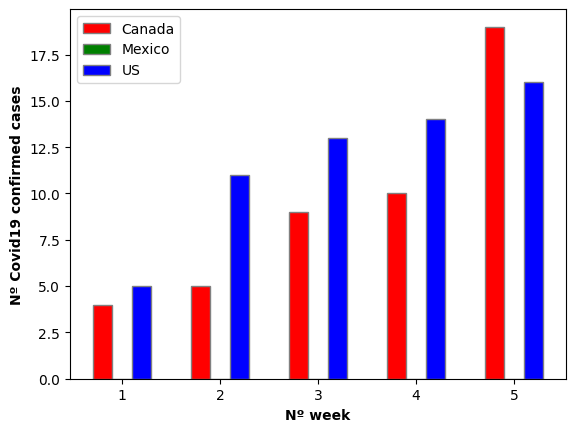

In [ ]:
#THE FIRST 5 WEEKS ([:5])

# set width of bar
barWidth = 0.2
#fig = plt.subplots(figsize =(40, 30))

# Set position of bar on X axis
br1 = np.arange(5)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, data_can_mex_week.loc['Canada'][:5].to_numpy(), color ='r', width = barWidth,
        edgecolor ='grey', label ='Canada')
plt.bar(br2, data_can_mex_week.loc['Mexico'][:5].to_numpy(), color ='g', width = barWidth,
        edgecolor ='grey', label ='Mexico')
plt.bar(br3, data_can_mex_week.loc['US'][:5].to_numpy(), color ='b', width = barWidth,
        edgecolor ='grey', label ='US')
 
# Adding Xticks
plt.xlabel('Nº week', fontweight ='bold', fontsize = 10)
plt.ylabel('Nº Covid19 confirmed cases', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(5)],
        list(range(1,6)) )

plt.legend()
plt.show()

#Commentaries:
#Canada had more Covid19 confirmed cases than US in hte 5th week

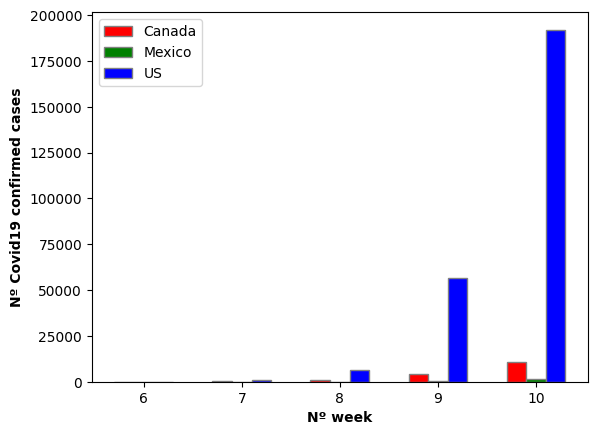

In [ ]:
#WEEK 6 TO 10 ([5:10])

# set width of bar
barWidth = 0.2
#fig = plt.subplots(figsize =(40, 30))

# Set position of bar on X axis
br1 = np.arange(5)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, data_can_mex_week.loc['Canada'][5:10].to_numpy(), color ='r', width = barWidth,
        edgecolor ='grey', label ='Canada')
plt.bar(br2, data_can_mex_week.loc['Mexico'][5:10].to_numpy(), color ='g', width = barWidth,
        edgecolor ='grey', label ='Mexico')
plt.bar(br3, data_can_mex_week.loc['US'][5:10].to_numpy(), color ='b', width = barWidth,
        edgecolor ='grey', label ='US')
 
# Adding Xticks
plt.xlabel('Nº week', fontweight ='bold', fontsize = 10)
plt.ylabel('Nº Covid19 confirmed cases', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(5)],
        list(range(6,11)) )

plt.legend()
plt.show()

#Commentaries:
#First Covid19 confirmed cases in Mexico
#US is almost at 200,000 confirmed cases of covid

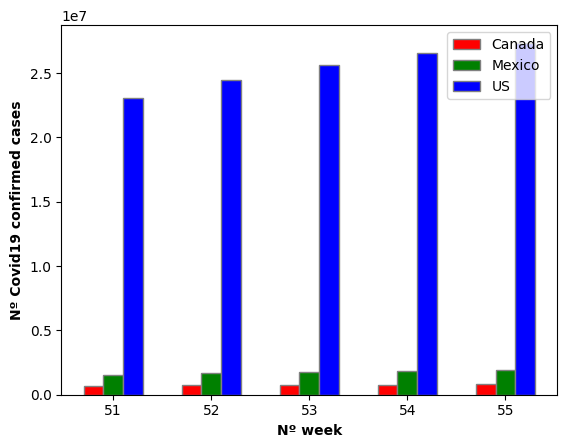

In [ ]:
#WEEK 51 TO 55 ([50:55])
#When aproximatelly the first cluster ends

# set width of bar
barWidth = 0.2
#fig = plt.subplots(figsize =(40, 30))

# Set position of bar on X axis
br1 = np.arange(5)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, data_can_mex_week.loc['Canada'][50:55].to_numpy(), color ='r', width = barWidth,
        edgecolor ='grey', label ='Canada')
plt.bar(br2, data_can_mex_week.loc['Mexico'][50:55].to_numpy(), color ='g', width = barWidth,
        edgecolor ='grey', label ='Mexico')
plt.bar(br3, data_can_mex_week.loc['US'][50:55].to_numpy(), color ='b', width = barWidth,
        edgecolor ='grey', label ='US')
 
# Adding Xticks
plt.xlabel('Nº week', fontweight ='bold', fontsize = 10)
plt.ylabel('Nº Covid19 confirmed cases', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(5)],
        list(range(51,56)) )

plt.legend()
plt.show()

#Commentaries:
#US is almost at 30,000,000 confirmed cases of covid
#After weeks, Mexico has more confirmed cases of covid than Canada
#Approximately in these weeks there was a massive increase of covid cases (the first wave of covid cases in the US).
#It would be recommended to the neighboring countries of Mexico and Canada to restrict access to the US during this period.

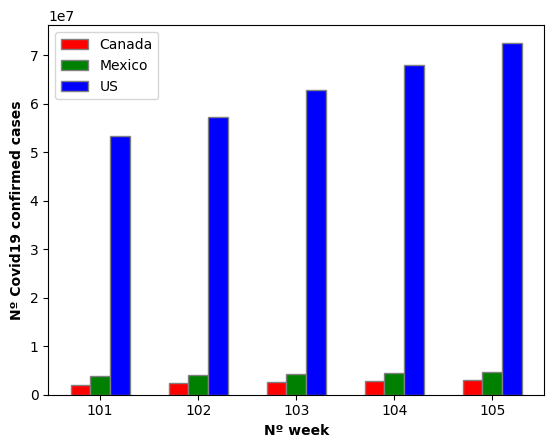

In [ ]:
#WEEK 101 TO 105 ([100:105])
#When aproximatelly the second cluster ends

# set width of bar
barWidth = 0.2
#fig = plt.subplots(figsize =(40, 30))

# Set position of bar on X axis
br1 = np.arange(5)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, data_can_mex_week.loc['Canada'][100:105].to_numpy(), color ='r', width = barWidth,
        edgecolor ='grey', label ='Canada')
plt.bar(br2, data_can_mex_week.loc['Mexico'][100:105].to_numpy(), color ='g', width = barWidth,
        edgecolor ='grey', label ='Mexico')
plt.bar(br3, data_can_mex_week.loc['US'][100:105].to_numpy(), color ='b', width = barWidth,
        edgecolor ='grey', label ='US')
 
# Adding Xticks
plt.xlabel('Nº week', fontweight ='bold', fontsize = 10)
plt.ylabel('Nº Covid19 confirmed cases', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(5)],
        list(range(101,106)) )

plt.legend()
plt.show()

#Commentaries:
#US had more than 70,000,000 confirmed cases of covid
#Approximately in these weeks there was a second massive increase of covid cases (the second wave of covid cases in the US).
#It would be recommended to the neighboring countries of Mexico and Canada to restrict access to the US during this period.

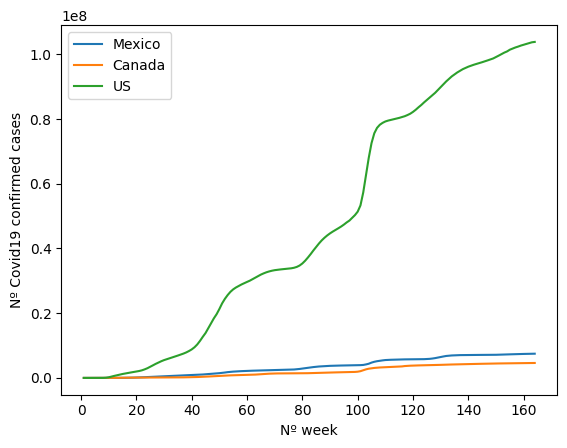

In [ ]:
#Additional plots
fig,ax = plt.subplots()
#fig = plt.subplots(figsize =(80, 30))

for country in ['Mexico','Canada','US']:
    ax.plot(list(range(1,data_can_mex_week.columns.size+1)),data_can_mex_week.loc[country].to_numpy(),label=country)

ax.set_xlabel("Nº week")
ax.set_ylabel("Nº Covid19 confirmed cases")
ax.legend(loc='best')
